In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array


In [ ]:
folder = '/content/drive/MyDrive/AI_TriTueNhanTao/Final/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('BICYCLE'):
    output= 1.0
  if file.startswith('CAR'):
    output= 2.0
  if file.startswith('MOTOBIKE'):
    output= 3.0
  if file.startswith('PLANE'):
    output= 4.0
  if file.startswith('SHIP'):
    output= 5.0
  if file.startswith('TRUCK'):
    output= 6.0
  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI_TriTueNhanTao/Data/final_photos.npy', photos)
save('/content/drive/MyDrive/AI_TriTueNhanTao/Data/final_labels.npy', labels)

(2787, 40, 40, 3) (2787,)


In [ ]:
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [ ]:
print(test_x.shape, train_x.shape)

(139, 40, 40, 3) (2648, 40, 40, 3)


In [ ]:
train_x = train_x.reshape((2648, 40, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((139, 40, 40, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,7)
test_y = to_categorical(test_y,7)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 51
epochs = 20
classes = 7

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                        

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/20
52/52 [==============================] - 159s 3s/step - loss: 1.7477 - accuracy: 0.2545
Epoch 2/20
52/52 [==============================] - 156s 3s/step - loss: 1.5585 - accuracy: 0.3527
Epoch 3/20
52/52 [==============================] - 155s 3s/step - loss: 1.2212 - accuracy: 0.5098
Epoch 4/20
52/52 [==============================] - 155s 3s/step - loss: 1.0454 - accuracy: 0.5910
Epoch 5/20
52/52 [==============================] - 155s 3s/step - loss: 0.9043 - accuracy: 0.6329
Epoch 6/20
52/52 [==============================] - 155s 3s/step - loss: 0.7132 - accuracy: 0.7239
Epoch 7/20
52/52 [==============================] - 155s 3s/step - loss: 0.6304 - accuracy: 0.7628
Epoch 8/20
52/52 [==============================] - 161s 3s/step - loss: 0.4288 - accuracy: 0.8395
Epoch 9/20
52/52 [==============================] - 160s 3s/step - loss: 0.3491 - accuracy: 0.8750
Epoch 10/20
52/52 [==============================] - 162s 3s/step - loss: 0.2253 - accuracy: 0.9128
Epoch 11/

In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 82ms/step - loss: 2.5688 - accuracy: 0.5468
Test accuracy: 0.5467625856399536


In [ ]:
model.save('/content/drive/MyDrive/AI_TriTueNhanTao/Data/final.h5')

1/1 [==============================] - 0s 37ms/step
MOTOBIKE


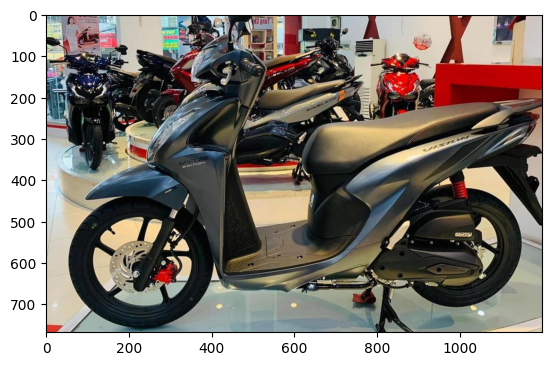

1/1 [==============================] - 0s 39ms/step
PLANE


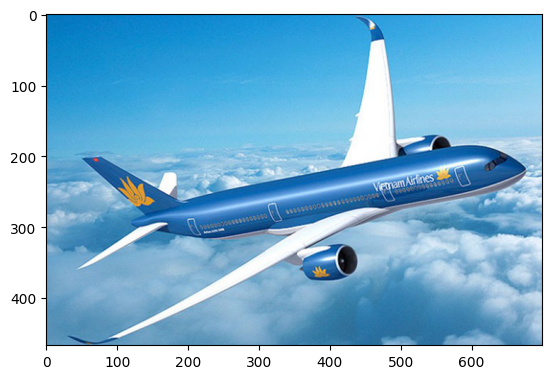

1/1 [==============================] - 0s 52ms/step
SHIP


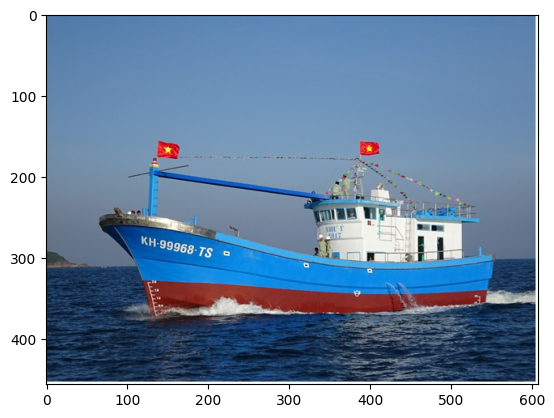

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/AI_TriTueNhanTao/Test_Final/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','BICYCLE', 'CAR', 'MOTOBIKE', 'PLANE', 'SHIP', 'TRUCK']
  print(class_name[result])
  plt.show()